**Q-1.** Imagine you have a dataset where you have different Instagram features
like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.

### Importing the required libraries and modules

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

### Loading the dataset and basic EDA

In [2]:
#load the data
df = pd.read_csv("instagram_reach.csv")

#### Take a quick look at data

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

#### Observations:
1. There are 100 records with 8 columns (fetaures) 
2. There are few values missing in Caption otherwise there are no missing values

### Data Cleaning and preprocessing

**Removing the columns which are not important**

There are 6 columns(features) that we are interested in. Namely Caption, Followers, Hashtags, Time since posted and Likes. The columns "Unnamed: 0" and "S.No" looks unimportant. Also we do not need USERNAME column. We can remove them before further processing. 

In [6]:
#first take backup of the dataset
df_backup = df.copy()
df_backup.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
#drop columns
df.drop(columns=['Unnamed: 0', 'S.No', 'USERNAME'], inplace = True)

#### Removing hours from the Time since posted and typecasting to int

In [8]:

df['Time since posted'] = df['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [9]:
df.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [10]:
df.describe()

,Followers,Time since posted,Likes
count,100.00000,100.000000,100.00000
mean,961.96000,3.460000,46.48000
std,1014.62567,3.394648,55.08698
min,11.00000,2.000000,8.00000
25%,252.75000,2.000000,19.00000
50%,612.00000,2.000000,29.00000
75%,1197.00000,3.000000,46.00000
max,4496.00000,24.000000,349.00000


**Handling the null values**

In [11]:
df.isnull().sum()

Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [12]:
#droping the null values since they are unlikley to effect the target variables
df.dropna()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...
95,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


#### Let's explore variables

In [13]:
cols = ['Followers', 'Time since posted', 'Likes']

In [14]:
def get_histplot(col):
    ax = sns.histplot(df[col], kde=True)
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR=Q3-Q1    
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    
    ax.axvline(Q1, color='red', linestyle='-', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='-', label="Q3")
    ax.axvline(lower_threshold, color='yellow', linestyle='-', label="Lower threshold")
    ax.axvline(upper_threshold, color='green', linestyle='-', label="Upper threshold")
    ax.legend()

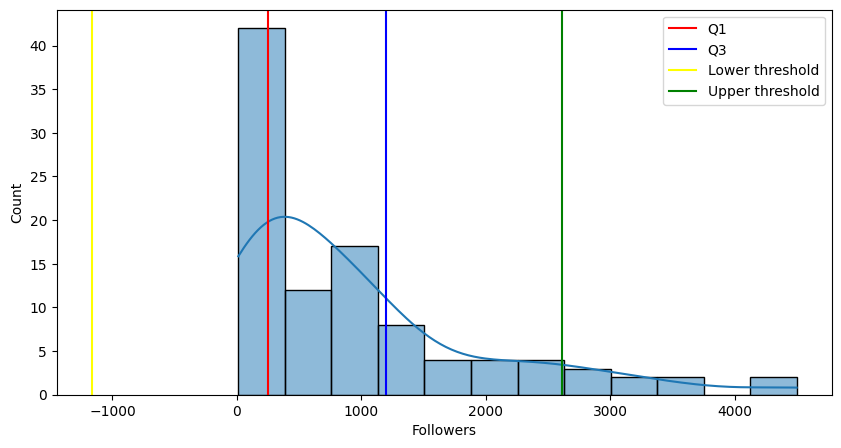

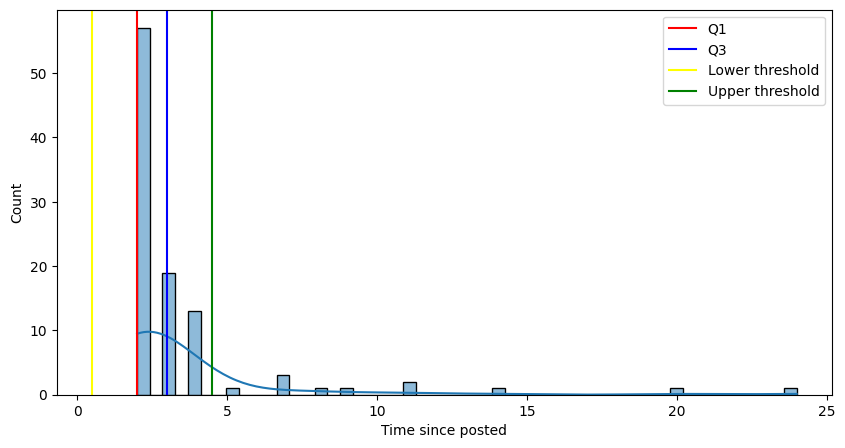

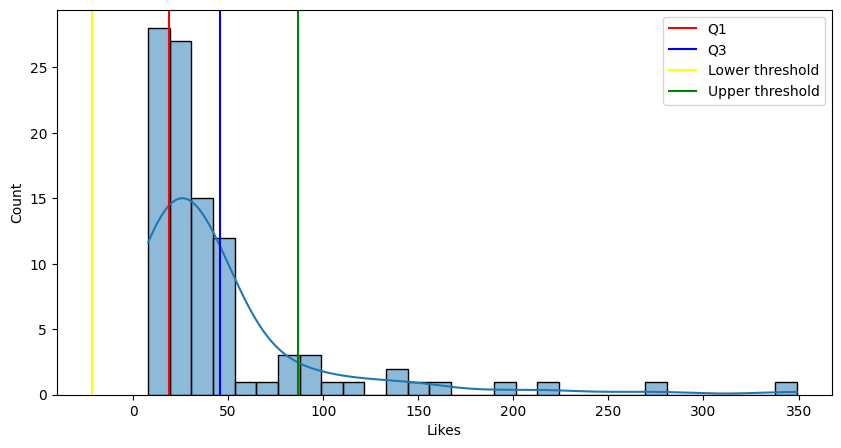

In [15]:
for i in cols:
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_histplot(i)

#### Check the outliers using boxplot

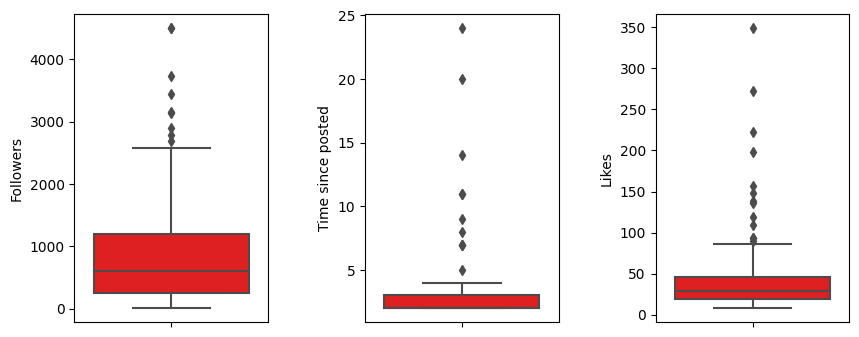

In [16]:
# create box plots
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10,4))
index = 0
ax = ax.flatten()

for col in cols:
    sns.boxplot(y=col, data=df, ax=ax[index], color='r')
    plt.subplots_adjust(wspace = .5)
    index += 1

#### Observation:

Data seems to be positively skewed.

#### Relationship between time since posted and likes

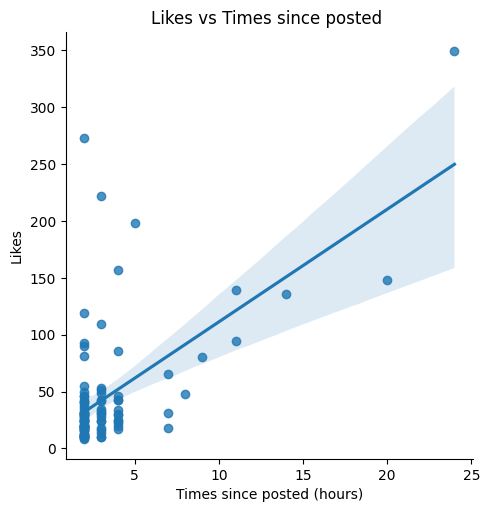

In [17]:
sns.lmplot(x='Time since posted', y='Likes', data=df, fit_reg=True)

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

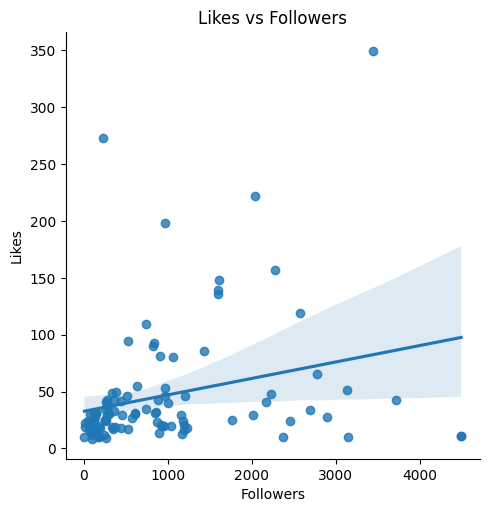

In [18]:
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True)

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

#### Normalize numerical input features


In [19]:
scaler = MinMaxScaler()
df[['Followers', 'Time since posted']] = scaler.fit_transform(df[['Followers', 'Time since posted']])

### Split the dataset

In [21]:
#Define x variables and y variable
x = df[['Followers', 'Time since posted']]
y = df['Likes']

#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Selection and training

In [25]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Model Evaluation

In [28]:
from numpy import absolute
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 25.941 (17.153)
